### A. Importing Dataset

In [121]:
import pandas as pd

# Load the dataset
file_path = "dataset/pixel_field_omni.csv"
df = pd.read_csv(file_path, delimiter=";")
df = df.astype(float)

# see the dataset
df.head()

,pixel_x,pixel_y,field_x,field_y
0,278.0,45.0,-200.0,-200.0
1,303.0,46.0,-150.0,-200.0
2,334.0,52.0,-100.0,-200.0
3,369.0,67.0,-50.0,-200.0
4,406.0,85.0,0.0,-200.0


### B. General Visualization

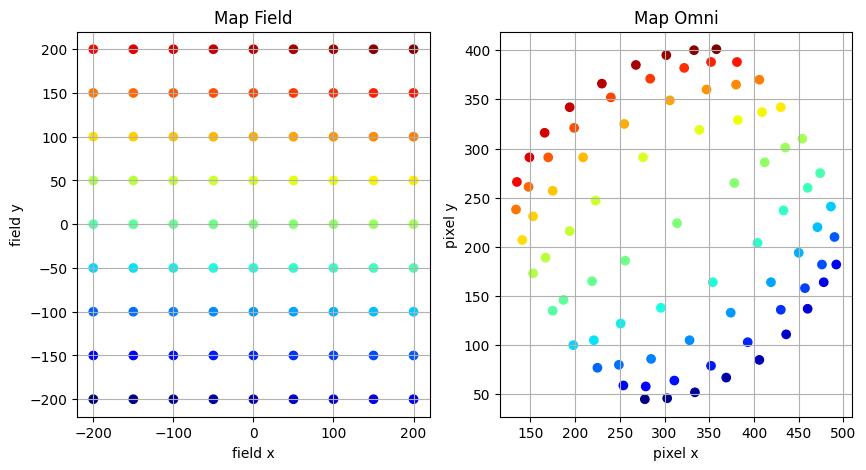

In [122]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plt.figure(figsize=(10,5))
ax1.set_title("Map Field")
ax1.set_xlabel("field x")
ax1.set_ylabel("field y")
ax1.scatter(df['field_x'], df['field_y'], c=df.index, cmap='jet')#, edgecolors='black')
ax1.grid()

ax2.set_title("Map Omni")
ax2.set_xlabel("pixel x")
ax2.set_ylabel("pixel y")
ax2.scatter(df['pixel_x'], df['pixel_y'], c=df.index, cmap='jet')#, edgecolors='black')
ax2.grid()

### C. Modeling Section

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [124]:
# # Use pixel coordinates as input
X_pixel = df[['pixel_x', 'pixel_y']].values  
Y_field = df[['field_x', 'field_y']].values  

# polynomial transformation
poly_transform = PolynomialFeatures(degree=2)
X_pixel_poly = poly_transform.fit_transform(X_pixel)

regressor_x = LinearRegression().fit(X_pixel_poly, Y_field[:, 0])  
regressor_y = LinearRegression().fit(X_pixel_poly, Y_field[:, 1])  

# predict field coordinates
pred_field_x = regressor_x.predict(X_pixel_poly)
pred_field_y = regressor_y.predict(X_pixel_poly)

In [125]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# errors for X and Y coordinates
mae_x = mean_absolute_error(Y_field[:, 0], pred_field_x)
mae_y = mean_absolute_error(Y_field[:, 1], pred_field_y)

mse_x = mean_squared_error(Y_field[:, 0], pred_field_x)
mse_y = mean_squared_error(Y_field[:, 1], pred_field_y)

rmse_x = np.sqrt(mse_x)
rmse_y = np.sqrt(mse_y)

r2_x = r2_score(Y_field[:, 0], pred_field_x)
r2_y = r2_score(Y_field[:, 1], pred_field_y)

# evaluation
print(f"Mean Absolute Error (MAE) - X: {mae_x:.3f}, Y: {mae_y:.3f}")
print(f"Mean Squared Error (MSE) - X: {mse_x:.3f}, Y: {mse_y:.3f}")
print(f"Root Mean Squared Error (RMSE) - X: {rmse_x:.3f}, Y: {rmse_y:.3f}")
print(f"R² Score - X: {r2_x:.3f}, Y: {r2_y:.3f}")

Mean Absolute Error (MAE) - X: 15.939, Y: 15.856
Mean Squared Error (MSE) - X: 420.201, Y: 416.332
Root Mean Squared Error (RMSE) - X: 20.499, Y: 20.404
R² Score - X: 0.975, Y: 0.975


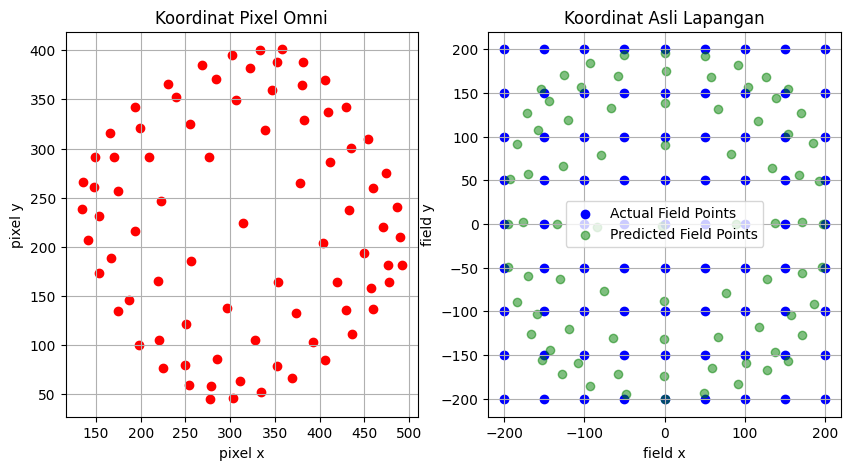

In [126]:
# Plot results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['pixel_x'], df['pixel_y'], c='r', label="Pixel Points")
plt.title("Koordinat Pixel Omni")
plt.xlabel("pixel x")
plt.ylabel("pixel y")
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(df['field_x'], df['field_y'], c='b', label="Actual Field Points")
plt.scatter(pred_field_x, pred_field_y, c='green', label="Predicted Field Points", alpha=0.5)
plt.title("Koordinat Asli Lapangan")
plt.xlabel("field x")
plt.ylabel("field y")
plt.legend()
plt.grid()

plt.show()


### D. Print the Equation (if possible)

In [127]:
feature_names = poly_transform.get_feature_names_out(['pixel_x', 'pixel_y'])

coeff_x = regressor_x.coef_
intercept_x = regressor_x.intercept_

# Extract coefficients for field_y regression
coeff_y = regressor_y.coef_
intercept_y = regressor_y.intercept_

# Construct equation for field_x
equation_x = " + ".join(f"{coeff:.4f} * {feature}" for coeff, feature in zip(coeff_x, feature_names))
equation_x = f"field_x = {equation_x} + {intercept_x:.4f}"

# Construct equation for field_y
equation_y = " + ".join(f"{coeff:.4f} * {feature}" for coeff, feature in zip(coeff_y, feature_names))
equation_y = f"field_y = {equation_y} + {intercept_y:.4f}"

# Print the equations
print("Equation for field_x:")
print(equation_x)
print("\nEquation for field_y:")
print(equation_y)

Equation for field_x:
field_x = 0.0000 * 1 + 0.8858 * pixel_x + 0.6096 * pixel_y + 0.0002 * pixel_x^2 + 0.0001 * pixel_x pixel_y + -0.0000 * pixel_y^2 + -440.1263

Equation for field_y:
field_y = 0.0000 * 1 + -0.6965 * pixel_x + 0.9053 * pixel_y + 0.0000 * pixel_x^2 + 0.0002 * pixel_x pixel_y + 0.0001 * pixel_y^2 + -8.3001


In [128]:
# import joblib

# # Save models
# joblib.dump(regressor_x, 'regressor_x.pkl')
# joblib.dump(regressor_y, 'regressor_y.pkl')
# joblib.dump(poly_transform, 'poly_transform.pkl')

# # Load models
# regressor_x = joblib.load('regressor_x.pkl')
# regressor_y = joblib.load('regressor_y.pkl')
# poly_transform = joblib.load('poly_transform.pkl')

In [129]:
import numpy as np
import pandas as pd

# Create DataFrame to store feature importance
feature_importance_x = pd.DataFrame({'Feature': feature_names, 'Coefficient': coeff_x})
feature_importance_y = pd.DataFrame({'Feature': feature_names, 'Coefficient': coeff_y})

# Sort by absolute coefficient values (most important features first)
feature_importance_x['Abs_Coefficient'] = np.abs(feature_importance_x['Coefficient'])
feature_importance_y['Abs_Coefficient'] = np.abs(feature_importance_y['Coefficient'])

top_features_x = feature_importance_x.sort_values(by='Abs_Coefficient', ascending=False).head(5)
top_features_y = feature_importance_y.sort_values(by='Abs_Coefficient', ascending=False).head(5)

# Print results
print("Intercept for field_x:", intercept_x)
print("Top 5 Most Important Features for field_x Prediction:")
print(top_features_x[['Feature', 'Coefficient']])

print("\nIntercept for field_y:", intercept_y)
print("Top 5 Most Important Features for field_y Prediction:")
print(top_features_y[['Feature', 'Coefficient']])

Intercept for field_x: -440.1262870991342
Top 5 Most Important Features for field_x Prediction:
           Feature  Coefficient
1          pixel_x     0.885801
2          pixel_y     0.609599
3        pixel_x^2     0.000152
4  pixel_x pixel_y     0.000144
5        pixel_y^2    -0.000049

Intercept for field_y: -8.30008849405255
Top 5 Most Important Features for field_y Prediction:
           Feature  Coefficient
2          pixel_y     0.905329
1          pixel_x    -0.696503
4  pixel_x pixel_y     0.000172
5        pixel_y^2     0.000122
3        pixel_x^2     0.000040


In [130]:
test_pixel_x = 338 #330
test_pixel_y = 317 #290
sample_test = np.array([test_pixel_x, test_pixel_y], dtype=float).reshape(-1, 2)
sample_poly = poly_transform.fit_transform(sample_test)
print(regressor_x.predict(sample_poly), regressor_y.predict(sample_poly))

[80.4295892] [78.51336974]
